In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('Medicare_Physician_and_Other_Supplier_National_Provider_Identifier__NPI__Aggregate_Report__Calendar_Year_2017.csv')


C:\Users\52070730\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
data.shape

(1088687, 71)

In [4]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [5]:
data.describe()

,National Provider Identifier,Provider RUCA,Number of HCPCS,Number of Services,Number of Medicare Beneficiaries,Total Submitted Charge Amount,Total Medicare Allowed Amount,Total Medicare Payment Amount,Total Medicare Standardized Payment Amount,Number of HCPCS Associated With Drug Services,Number of Drug Services,Number of Medicare Beneficiaries With Drug Services,Total Drug Submitted Charge Amount,Total Drug Medicare Allowed Amount,Total Drug Medicare Payment Amount,Total Drug Medicare Standardized Payment Amount,Number of HCPCS Associated With Medical Services,Number of Medical Services,Number of Medicare Beneficiaries With Medical Services,Total Medical Submitted Charge Amount,Total Medical Medicare Allowed Amount,Total Medical Medicare Payment Amount,Total Medical Medicare Standardized Payment Amount,Average Age of Beneficiaries,Number of Beneficiaries Age Less 65,Number of Beneficiaries Age 65 to 74,Number of Beneficiaries Age 75 to 84,Number of Beneficiaries Age Greater 84,Number of Female Beneficiaries,Number of Male Beneficiaries,Number of Non-Hispanic White Beneficiaries,Number of Black or African American Beneficiaries,Number of Asian Pacific Islander Beneficiaries,Number of Hispanic Beneficiaries,Number of American Indian/Alaska Native Beneficiaries,Number of Beneficiaries With Race Not Elsewhere Classified,Number of Beneficiaries With Medicare Only Entitlement,Number of Beneficiaries With Medicare & Medicaid Entitlement,Percent (%) of Beneficiaries Identified With Atrial Fibrillation,Percent (%) of Beneficiaries Identified With Alzheimer’s Disease or Dementia,Percent (%) of Beneficiaries Identified With Asthma,Percent (%) of Beneficiaries Identified With Cancer,Percent (%) of Beneficiaries Identified With Heart Failure,Percent (%) of Beneficiaries Identified With Chronic Kidney Disease,Percent (%) of Beneficiaries Identified With Chronic Obstructive Pulmonary Disease,Percent (%) of Beneficiaries Identified With Depression,Percent (%) of Beneficiaries Identified With Diabetes,Percent (%) of Beneficiaries Identified With Hyperlipidemia,Percent (%) of Beneficiaries Identified With Hypertension,Percent (%) of Beneficiaries Identified With Ischemic Heart Disease,Percent (%) of Beneficiaries Identified With Osteoporosis,Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis,Percent (%) of Beneficiaries Identified With Schizophrenia / Other Psychotic Disorders,Percent (%) of Beneficiaries Identified With Stroke,Average HCC Risk Score of Beneficiaries
count,1.088687e+06,1.081476e+06,1.088687e+06,1.088687e+06,1.088687e+06,1.088687e+06,1.088687e+06,1.088687e+06,1.088687e+06,974072.000000,9.740720e+05,974072.000000,9.740720e+05,9.740720e+05,9.740720e+05,9.740720e+05,974072.000000,9.740720e+05,9.740720e+05,9.740720e+05,9.740720e+05,9.740720e+05,9.740720e+05,1.088687e+06,703800.000000,917912.000000,777508.000000,640677.000000,969611.000000,969611.000000,7.359840e+05,373993.000000,194174.000000,289083.000000,329303.000000,175071.000000,8.155600e+05,815560.000000,741411.000000,736259.000000,678916.000000,733004.000000,817602.000000,921763.000000,798311.000000,928809.000000,934900.000000,992853.000000,1.031998e+06,927158.000000,681480.000000,986548.000000,501102.000000,595309.000000,1.088687e+06
mean,1.499726e+09,1.568721e+00,3.071504e+01,2.708049e+03,3.550545e+02,3.513208e+05,1.177331e+05,8.998250e+04,9.074084e+04,1.965088,1.161425e+03,28.123060,3.602838e+04,1.719695e+04,1.356678e+04,1.370174e+04,28.454297,1.693131e+03,3.596554e+02,3.239278e+05,1.031280e+05,7.859773e+04,7.922531e+04,7.075125e+01,82.016496,167.483221,140.108391,85.098006,226.793136,167.923722,3.890453e+02,84.238644,29.623657,58.292407,3.569391,21.190745,3.366249e+02,112.618944,15.259084,18.518633,10.367387,13.903554,26.270771,38.582204,21.559018,32.359834,36.609974,53.239469,6.768048e+01,39.464277,10.106426,47.827940,7.775732,8.732529,1.624142e+00
std,2.879212e+08,1.604442e+00,3.375675e+01,3.767005e+04,2.914876e+03,2.569238e+06,6.003066

In [6]:
data.head(2)

,National Provider Identifier,Last Name/Organization Name of the Provider,First Name of the Provider,Middle Initial of the Provider,Credentials of the Provider,Gender of the Provider,Entity Type of the Provider,Street Address 1 of the Provider,Street Address 2 of the Provider,City of the Provider,Zip Code of the Provider,Provider RUCA,State Code of the Provider,Country Code of the Provider,Provider Type of the Provider,Medicare Participation Indicator,Number of HCPCS,Number of Services,Number of Medicare Beneficiaries,Total Submitted Charge Amount,Total Medicare Allowed Amount,Total Medicare Payment Amount,Total Medicare Standardized Payment Amount,Drug Suppress Indicator,Number of HCPCS Associated With Drug Services,Number of Drug Services,Number of Medicare Beneficiaries With Drug Services,Total Drug Submitted Charge Amount,Total Drug Medicare Allowed Amount,Total Drug Medicare Payment Amount,Total Drug Medicare Standardized Payment Amount,Medical Suppress Indicator,Number of HCPCS Associated With Medical Services,Number of Medical Services,Number of Medicare Beneficiaries With Medical Services,Total Medical Submitted Charge Amount,Total Medical Medicare Allowed Amount,Total Medical Medicare Payment Amount,Total Medical Medicare Standardized Payment Amount,Average Age of Beneficiaries,Number of Beneficiaries Age Less 65,Number of Beneficiaries Age 65 to 74,Number of Beneficiaries Age 75 to 84,Number of Beneficiaries Age Greater 84,Number of Female Beneficiaries,Number of Male Beneficiaries,Number of Non-Hispanic White Beneficiaries,Number of Black or African American Beneficiaries,Number of Asian Pacific Islander Beneficiaries,Number of Hispanic Beneficiaries,Number of American Indian/Alaska Native Beneficiaries,Number of Beneficiaries With Race Not Elsewhere Classified,Number of Beneficiaries With Medicare Only Entitlement,Number of Beneficiaries With Medicare & Medicaid Entitlement,Percent (%) of Beneficiaries Identified With Atrial Fibrillation,Percent (%) of Beneficiaries Identified With Alzheimer’s Disease or Dementia,Percent (%) of Beneficiaries Identified With Asthma,Percent (%) of Beneficiaries Identified With Cancer,Percent (%) of Beneficiaries Identified With Heart Failure,Percent (%) of Beneficiaries Identified With Chronic Kidney Disease,Percent (%) of Beneficiaries Identified With Chronic Obstructive Pulmonary Disease,Percent (%) of Beneficiaries Identified With Depression,Percent (%) of Beneficiaries Identified With Diabetes,Percent (%) of Beneficiaries Identified With Hyperlipidemia,Percent (%) of Beneficiaries Identified With Hypertension,Percent (%) of Beneficiaries Identified With Ischemic Heart Disease,Percent (%) of Beneficiaries Identified With Osteoporosis,Percent (%) of Beneficiaries Identified With Rheumatoid Arthritis / Osteoarthritis,Percent (%) of Beneficiaries Identified With Schizophrenia / Other Psychotic Disorders,Percent (%) of Beneficiaries Identified With Stroke,Average HCC Risk Score of Beneficiaries
0,1003000126,ENKESHAFI,ARDALAN,NaN,M.D.,M,I,900 SETON DR,NaN,CUMBERLAND,215021854,1.0,MD,US,Internal Medicine,Y,23,1670.0,578,800850.0,177181.14,137084.55,138279.12,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,23.0,1670.0,578.0,800850.0,177181.14,137084.55,138279.12,75,84.0,186.0,187.0,121.0,338.0,240.0,525.0,38.0,NaN,NaN,0.0,NaN,425.0,153.0,24.0,29.0,11.0,14.0,47.0,65.0,36.0,46.0,51.0,67.0,75.0,56.0,9.0,49.0,8.0,13.0,2.1178
1,1003000134,CIBULL,THOMAS,L,M.D.,M,I,2650 RIDGE AVE,EVANSTON HOSPITAL,EVANSTON,602011718,1.0,IL,US,Pathology,Y,20,8149.0,3703,1272161.0,319561.26,243698.97,235917.60,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,20.0,8149.0,3703.0,1272161.0,319561.26,243698.97,235917.60,76,86.0,1582.0,1298.0,737.0,1802.0,1901.0,3407.0,NaN,63.0,62.0,NaN,118.0,3503.0,200.0,12.0,7.0,4.0,13.0,13.0,19.0,8.0,12.0,20.0,34.0,55.0,27.0,9.0,36.0,1.0,3.0,1.1024


# total number of physicians

In [16]:
#total number of physicians
ct=data['National Provider Identifier'].count()
print('Total Number of Physicians:',ct)

Total Number of Physicians: 1088687



# list physician by "type of provider"

In [43]:
#list physician by "type of provider"
tp=data.groupby('Entity Type of the Provider')['National Provider Identifier'].count()
tp

Entity Type of the Provider
I    1026824
O      61863
Name: National Provider Identifier, dtype: int64

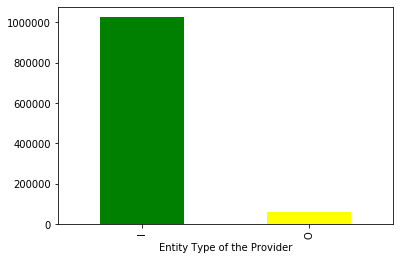

In [50]:
tp.plot(kind='bar',color=['Green','Yellow'])
plt.show()


# Do the number of doctors by "type of provider" make sense?
Yes,
Type I is leading and is most prefered by the physician.


# list physician by "state"

In [51]:
#list physician by "state"
sp=data.groupby('State Code of the Provider')['National Provider Identifier'].count().sort_values(ascending=False).head(10)
sp

State Code of the Provider
CA    88265
NY    76169
TX    69092
FL    66406
PA    54961
IL    44672
OH    43858
MI    39582
NC    36366
MA    34366
Name: National Provider Identifier, dtype: int64

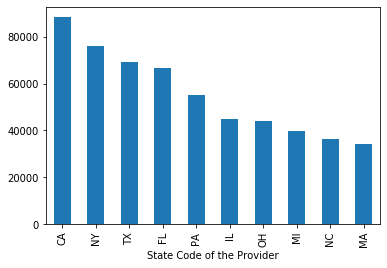

In [53]:
#visualising only top 10 leading states.
sp.plot(kind='bar')
plt.show()


# Do the number of doctors by "state" make sense?
Yes. State CA is having the most number of Doctors.

# list physician by "gender" 

In [54]:
#list physician by "gender" 
gp=data.groupby('Gender of the Provider')['National Provider Identifier'].count().sort_values(ascending=False)
gp

Gender of the Provider
M    574380
F    452444
Name: National Provider Identifier, dtype: int64

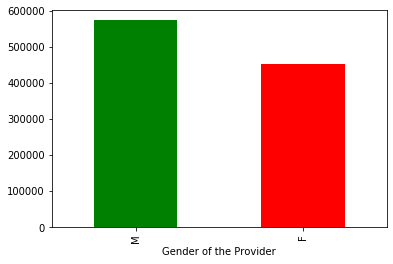

In [56]:
#Count of Physician by gender
gp.plot(kind='bar',color=['Green','Red'])
plt.show()


# list physician by "credentials"

In [59]:
#list physician by "credentials"
cp=data.groupby('Credentials of the Provider')['National Provider Identifier'].count().sort_values(ascending=False).head(20)
cp

Credentials of the Provider
MD      256234
M.D.    251705
CRNA     36099
PA-C     35750
D.O.     31355
DO       21812
D.C.     21537
O.D.     18914
NP       17985
PA       15734
PT       14550
DPT      11436
FNP      11369
DC       10710
DPM       9845
OD        8723
M.D       8683
ARNP      8445
LCSW      8257
APRN      7558
Name: National Provider Identifier, dtype: int64

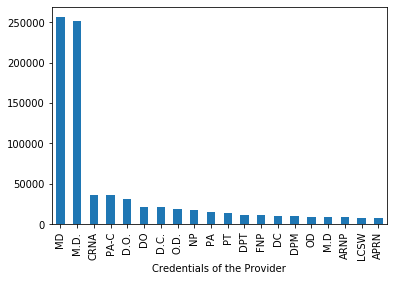

In [60]:
#visualising only top 20 leading credentials.
cp.plot(kind='bar')
plt.show()


In [83]:
data['Credentials of the Provider_1']=data['Credentials of the Provider'].replace({'O.D.':'OD','M.D.':'MD','D.O.':'DO','O.D':'OD','D.C.':'DC','M.D':'MD'})

In [85]:
#list physician by "credentials"
cp=data.groupby('Credentials of the Provider_1')['National Provider Identifier'].count().sort_values(ascending=False).head(20)
cp

Credentials of the Provider_1
MD       516622
DO        53167
CRNA      36099
PA-C      35750
DC        32247
OD        28092
NP        17985
PA        15734
PT        14550
DPT       11436
FNP       11369
DPM        9845
ARNP       8445
LCSW       8257
APRN       7558
CRNP       5626
PH.D.      5560
P.T.       5120
P.A.       4738
FNP-C      4630
Name: National Provider Identifier, dtype: int64

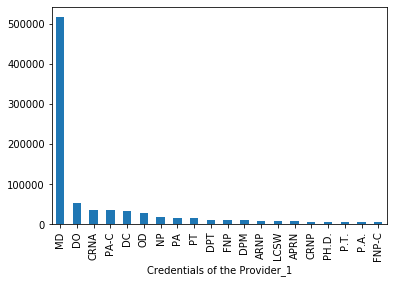

In [86]:
#visualising only top 20 leading credentials.
cp.plot(kind='bar')
plt.show()


# Can you cross-check against any other data source that you can think? 
Yes,
1.Physician by gender is having the nearby same ratio of physicians.
2.MD is the most credentials done by the Physicians.

3.  Segment physicians by "Number of Medicare Beneficiaries" for any given year (say 2017) - Divide physicians in 5 buckets based on ones that treat MOST to FEWEST Medicare beneficiaries - Label each bucket Beneficiary Segment 1 (highest) to Beneficiary Segment 5 (lowest)- How many physicians in each bucket?  What is the average # of beneficiaries by each bucket?  What is the highest and lowest number for each segment?  


In [95]:
highest=data.groupby('National Provider Identifier')['Number of Medicare Beneficiaries'].sum().sort_values(ascending=False).head(5)
highest

National Provider Identifier
1538144910    1575978
1063497451     901798
1891731626     737483
1295726032     656645
1366479099     629319
Name: Number of Medicare Beneficiaries, dtype: int64

In [96]:
lowest=data.groupby('National Provider Identifier')['Number of Medicare Beneficiaries'].sum().sort_values(ascending=True).head(5)
lowest

National Provider Identifier
1598818940    11
1891748182    11
1518370162    11
1588827596    11
1700078771    11
Name: Number of Medicare Beneficiaries, dtype: int64

# What is the highest and lowest number for each segment?  
highest: 1575978
lowest: 11

Can you repeat step#3 above based on "Total Medical Medicare Standardized Payment Amount"  - This time call the segments Payment Segment 1 to Payment Segment 5 

In [98]:
highest=data.groupby('National Provider Identifier')['Total Medicare Standardized Payment Amount'].sum().sort_values(ascending=False).head(5)
highest

National Provider Identifier
1538144910    2.378553e+08
1063497451    1.313576e+08
1629407069    1.162447e+08
1891731626    1.134511e+08
1134277494    1.015643e+08
Name: Total Medicare Standardized Payment Amount, dtype: float64

In [99]:
Lowest=data.groupby('National Provider Identifier')['Total Medicare Standardized Payment Amount'].sum().sort_values(ascending=True).head(5)
Lowest

National Provider Identifier
1033420898    0.00
1619900628    0.00
1245580471    0.00
1063506798    0.00
1457430415    2.17
Name: Total Medicare Standardized Payment Amount, dtype: float64